In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
df = pd.read_csv('mushroom.csv')
df = df.drop(columns=['Unnamed: 0'])  # Drop the unnecessary index column

In [5]:
# Data Overview
print(df.info())
print(df.head())
print(df.isnull().sum())
print(df.nunique())
print(df['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

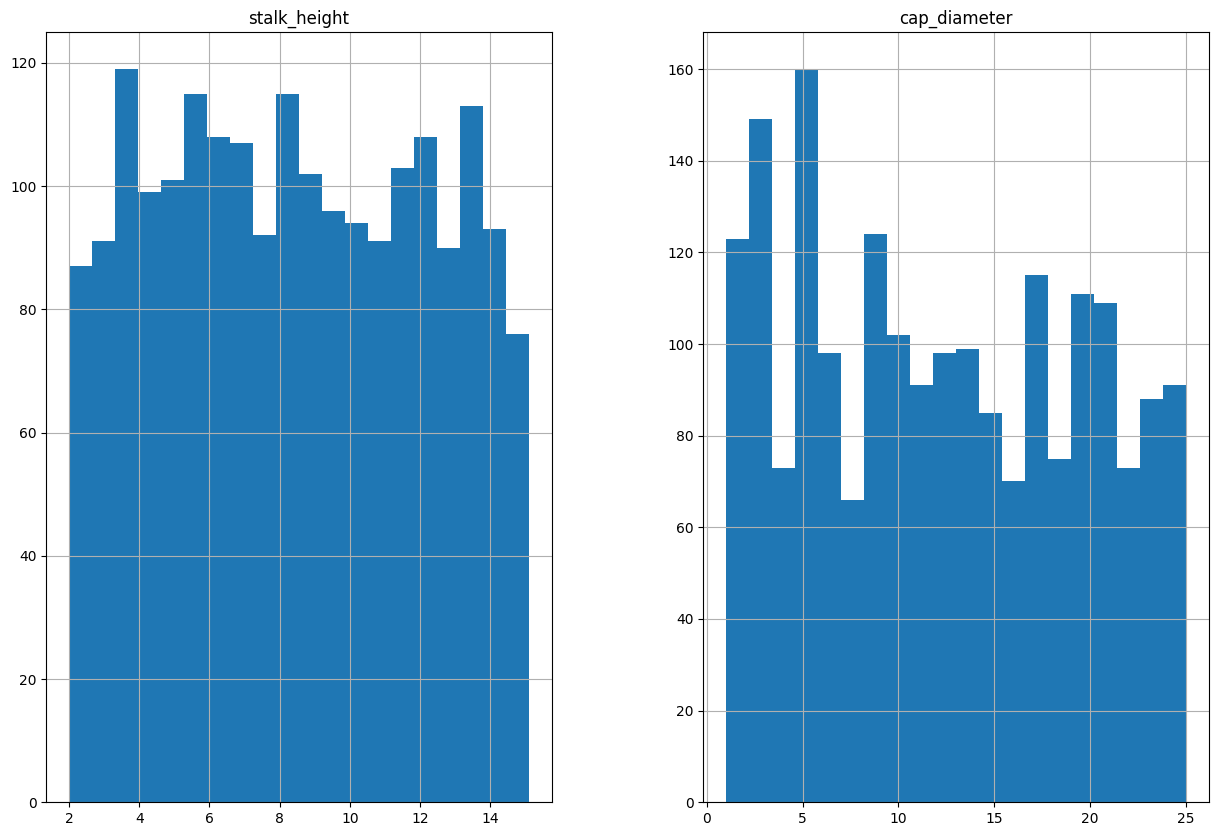

In [7]:
# Visualizations
# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.show()

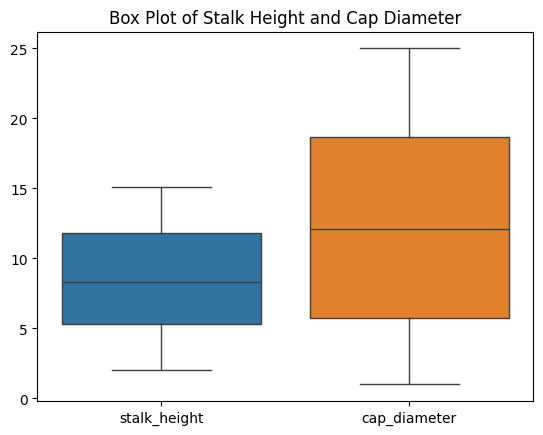

In [9]:
# Box Plots for numerical features
sns.boxplot(data=df[['stalk_height', 'cap_diameter']])
plt.title("Box Plot of Stalk Height and Cap Diameter")
plt.show()

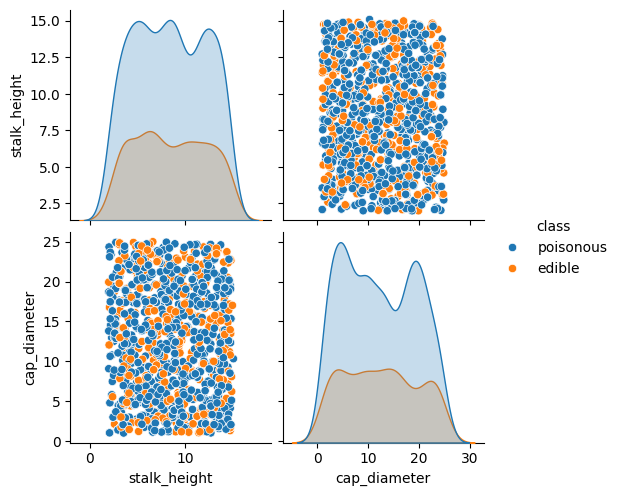

In [11]:
# Pair Plot
sns.pairplot(df, hue='class')
plt.show()

In [13]:
# Encode categorical variables
df_encoded = pd.get_dummies(df.drop('class', axis=1), drop_first=True)
y = df['class'].apply(lambda x: 1 if x == 'poisonous' else 0)  # Binary encoding of target

In [15]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

In [17]:
# SVM Implementation
svm = SVC(kernel='linear')  # Start with a linear kernel
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
# Predictions and Evaluation
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1-Score: 0.800599700149925


In [23]:
# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# Evaluate the best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Precision:", precision_score(y_test, y_pred_best))
print("Best Model Recall:", recall_score(y_test, y_pred_best))
print("Best Model F1-Score:", f1_score(y_test, y_pred_best))